# Goal: Illustrate how translation voxel compositions changes with growth rate

## 1. Perform linear regression on experimental data to continuously approximate how cell compositions change with growth rate. 

### 1a. Gather experimental values of ribosomes, ternary complexes, cell mass, and cell volume as a function of growth rate from literature.

In [6]:
import numpy as np
import matplotlib.pyplot as plt


#Active Ribosomes
x_rib = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
y_rib = np.array([8000,15000,26000,44000,61000,73000])
y_rib = np.array([int(y_i*0.85) for y_i in y_rib])

#Ternary complexes
x_tern = np.array([0.4,0.7,1.07,1.6,2.5,3.0]+[0.4]*5)
y_tern = np.array([48000,57000,83000,143000,323000,383000]+[48000]*5)

#Cell mass
x_mass = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
y_mass = np.array([159,257,370,512,607,636])

## Cell Volume
x_vol = np.array([0.25,0.42,0.56,0.58,0.68,0.71,0.87,1.81,1.85,2.15,2.3])
y_vol = np.array([1.14,1.44,1.74,1.26,1.11,1.38,1.44,2.15,2.34,2.46,2.4])

##Nucleoid volume
x_nuc = np.array([0.4,1.36,2.85])
y_nuc = np.array([0.17,0.13,0.11])

x = np.array([x_rib, x_tern, x_mass, x_vol,x_nuc])
y = np.array([y_rib, y_tern, y_mass, y_vol,y_nuc])
label = np.array(["Ribosomes", "Ternary complexes", "Cell mass", "Cell volume","Nucleoid volume"])

### 1b. Perform leave one out validation & calculate AICc scores for different models (i.e., 0th order, 1st order, 2nd order, and 3rd order polynomial) to find the best model to fit each experimental dataset (i.e., the lowest-complexity model that can best predict experimental data)

In [7]:
def LOVO(x,y,order):
    SSE_tot=0
    for i in range(0,len(y)):
        x_lovo = np.append(x[:i],x[i+1 :])
        y_lovo = np.append(y[:i], y[i+1 :])
        y_model = np.polyfit(x_lovo,y_lovo,order)
        
        y_i_hat = np.polyval(y_model,x[i])
        SSE_lovo = np.abs(y[i] - y_i_hat)
        SSE_tot += SSE_lovo
        
        x_plot = np.linspace(0.6,3)        
        y_plot   = np.polyval(y_model,x_plot)
        #plt.plot(x_plot,y_plot)
        #print(SSE_lovo)
    SSE_avg = SSE_tot/(len(y))
    return SSE_avg
    
def calcAICc(n,k,SSE):
    k=k+1
    AIC = 2*(k)+n*np.log(SSE/n)
    AICc =  AIC + (2*(k**2)+2*k)/(n-k-1)
    return AICc

In [8]:
for i in range(len(x)):
    print("\n",label[i])
    LOVO_scores = list()
    AICc_scores = list()
    for order in range(3):
        LOVO_scores.append(LOVO(x[i],y[i],order))
        polyfit,SS_err,_,_,_ = np.polyfit(x[i],y[i],order,full=True)
        AICc_scores.append(calcAICc(len(x[i]),len(polyfit),SS_err))
    print("LOVO Scores: ", ['{:.2e}'.format(score) for score in LOVO_scores], "Min order: ", np.argmin(LOVO_scores))
    print("AICc Scores: ", ['{:.2e}'.format(score[0]) for score in AICc_scores], "Min order: ", np.argmin(AICc_scores))


 Ribosomes
LOVO Scores:  ['2.19e+04', '2.49e+03', '4.07e+03'] Min order:  1
AICc Scores:  ['1.27e+02', '1.10e+02', '1.37e+02'] Min order:  1

 Ternary complexes
LOVO Scores:  ['1.00e+05', '2.35e+04', '1.55e+04'] Min order:  2
AICc Scores:  ['2.62e+02', '2.29e+02', '2.19e+02'] Min order:  2

 Cell mass
LOVO Scores:  ['1.94e+02', '4.00e+01', '3.94e+01'] Min order:  2
AICc Scores:  ['7.01e+01', '5.84e+01', '8.13e+01'] Min order:  1

 Cell volume
LOVO Scores:  ['5.03e-01', '1.66e-01', '1.88e-01'] Min order:  1
AICc Scores:  ['-9.66e+00', '-2.85e+01', '-2.36e+01'] Min order:  1

 Nucleoid volume


ZeroDivisionError: division by zero

Above we determined using LOVO and AICc that ribosomes should be fit with a 1st order polynomial; ternary complexes with a 2nd order polynomial; cell mass with either a 1st or 2nd order polynomial; and cell volume with a 1st order polynomial. We note that, while replicates were not always clearly reported for the above measurements, there are more replicates than shown above. As an upper bound, if we double the repliates for ribosomes and cell mass (i.e., ~2 measures per growth rate in Bremer 1997) as well as cell volume (small standard deviation was reported indicating multiple replicates in Volkmer 2011, but replicate data was not shown), we see the following:

In [9]:
#Active Ribosomes
x_rib_adj = np.array([0.6,1.0,1.5,2.0,2.5,3.0]*2)
y_rib_adj = np.array([8000,15000,26000,44000,61000,73000]*2)
y_rib_adj = np.array([int(y_i*0.85) for y_i in y_rib_adj])

#Ternary complexes
x_tern = np.array([0.4,0.7,1.07,1.6,2.5,3.0]+[0.4]*5)
y_tern = np.array([48000,57000,83000,143000,323000,383000]+[48000]*5)

#Cell mass
x_mass_adj = np.array([0.6,1.0,1.5,2.0,2.5,3.0]*2)
y_mass_adj = np.array([159,257,370,512,607,636]*2)

## Cell Volume
x_vol_adj = np.array([0.25,0.42,0.56,0.58,0.68,0.71,0.87,1.81,1.85,2.15,2.3]*2)
y_vol_adj = np.array([1.14,1.44,1.74,1.26,1.11,1.38,1.44,2.15,2.34,2.46,2.4]*2)

x_adj = np.array([x_rib_adj, x_tern, x_mass_adj, x_vol_adj, x_nuc])
y_adj = np.array([y_rib_adj, y_tern, y_mass_adj, y_vol_adj,y_nuc])
label = np.array(["Ribosomes", "Ternary complexes", "Cell mass", "Cell volume","Nucleoid volume"])

for i in range(len(x_adj)):
    print("\n",label[i])
    LOVO_scores = list()
    AICc_scores = list()
    for order in range(3):
        LOVO_scores.append(LOVO(x_adj[i],y_adj[i],order))
        y_model,SS_err,_,_,_ = np.polyfit(x_adj[i],y_adj[i],order,full=True)
        AICc_scores.append(calcAICc(len(x_adj[i]),len(y_model),SS_err))
    print("LOVO Scores: ", ['{:.2e}'.format(score) for score in LOVO_scores], "Min order: ", np.argmin(LOVO_scores))
    print("AICc Scores: ", ['{:.2e}'.format(score[0]) for score in AICc_scores], "Min order: ", np.argmin(AICc_scores))
    


 Ribosomes
LOVO Scores:  ['1.99e+04', '1.96e+03', '2.08e+03'] Min order:  1
AICc Scores:  ['2.43e+02', '1.92e+02', '1.92e+02'] Min order:  2

 Ternary complexes
LOVO Scores:  ['1.00e+05', '2.35e+04', '1.55e+04'] Min order:  2
AICc Scores:  ['2.62e+02', '2.29e+02', '2.19e+02'] Min order:  2

 Cell mass
LOVO Scores:  ['1.76e+02', '2.95e+01', '2.02e+01'] Min order:  2
AICc Scores:  ['1.30e+02', '8.97e+01', '8.02e+01'] Min order:  2

 Cell volume
LOVO Scores:  ['4.79e-01', '1.51e-01', '1.57e-01'] Min order:  1
AICc Scores:  ['-2.57e+01', '-6.86e+01', '-6.61e+01'] Min order:  1

 Nucleoid volume


ZeroDivisionError: division by zero

Here we see that while ternary complexes and cell volumes remain at the same predicted best fit order, cell mass now is best fit by a 2nd order polynomial, and ribosomes may be best fit by either a 1st or 2nd order polynomial. We choose to fit cell mass with a 2nd order polynomial, and to minimize model complexity choose to fit ribosomes with a 1st order polynomial. This choice is further validated after fitting a 1st and 2nd order polynomial to both and qualitatively assessing the distribution of residuals (i.e., residuals do not appear randomly distributed if fitting a 1st order polynomial to cell mass, but do seem randomly distributed when fitting a 1st order polynomial to ribosomes)

### 1c. Next, we fit corresponding polynomials to each experimental data set and calculate $R^2$ and $R^2_{adjusted}$ and plot


In [10]:
def calc_R2(x,y,y_hat):
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    return 1-SS_err/SS_tot

In [11]:
def round_sf(number, significant):
    return round(number, significant - len(str(number)))

R2:
Ribosomes


TypeError: unsupported operand type(s) for +: 'Zero' and 'numpy.str_'

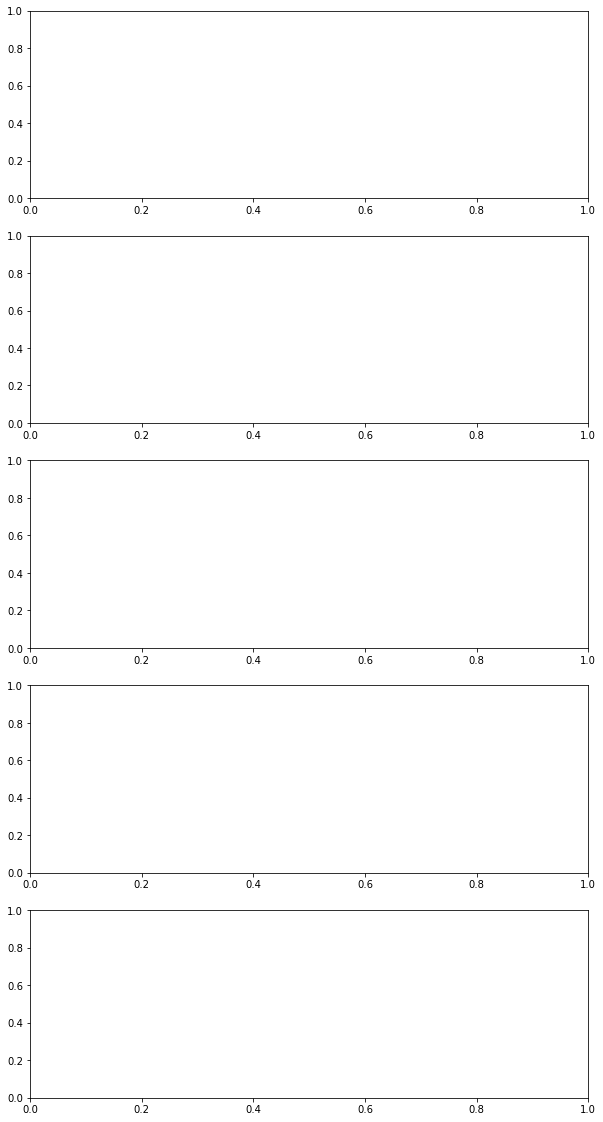

In [12]:
from sympy import S, symbols, expand, Symbol
import sympy

order = [1,2,2,1,1]

x_sweep = list()
y_hat_sweep = list()
fig,ax = plt.subplots(5,1,figsize=(10,20))
x_labels = ['Abundance','Abundance','Mass (fg)','Volume (fL)', 'Volume (fL)']

print("R2:")
for i in range(len(x)):
    print(label[i])
    y_model,SS_err,_,_,_ = np.polyfit(x[i],y[i],order[i],full=True)
    y_hat = np.polyval(y_model,x[i])
    x_sweep_i = np.linspace(min(x[i]),max(x[i]),1000)
    y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
    #poly = sum(S("{:2.2f}".format(v))*x**i for i, v in enumerate(y_model[::-1]))
    #eq_latex = sympy.printing.latex(poly)
    x_sym=Symbol('x')
    y_mode=np.poly1d(y_model)
    y_mode=np.poly1d(["{:2.2g}".format(i) for i in y_mode])
    print(sympy.printing.latex(expand(y_mode(x_sym))))
    print(np.polyval(y_model,3))
    print(calc_R2(x[i],y[i],y_hat))
    print(y_model)
    x_sweep.append(x_sweep_i)
    y_hat_sweep.append(y_hat_sweep_i)
    ax[i].plot(x_sweep_i,y_hat_sweep_i)
    ax[i].scatter(x[i],y[i],label="y = ${}$".format(sympy.printing.latex(expand(y_mode(x_sym)))))
    #ax[i].set_title(label[i],fontsize=16,horizontalalignment='right',verticalalignment='center')
    
    ax2 = ax[i].twinx()
    ax2.yaxis.set_ticks_position('none') 
    ax2.yaxis.set_ticklabels('')
    ax2.set_ylabel(label[i],fontsize=22,rotation=270)
    ax2.get_yaxis().set_label_coords(1.05,0.5)

    ax2.add_patch(plt.Rectangle((1,0),0.1, 1,facecolor='silver', transform= ax2.get_yaxis_transform(),
                              clip_on=False,linewidth = 0))

    #ax[i].set_xlabel("Doubling rates (1/hr)", fontsize=16)
    ax[i].set_ylabel(x_labels[i],fontsize=20)
    ax[i].get_yaxis().set_label_coords(-0.12,0.5)
    ax[i].tick_params(axis = 'both', which = 'major', labelsize = 14)

    ax[i].annotate("$R^2$ ="+str(round(calc_R2(x[i],y[i],y_hat),3)),xy=(1, 0), xycoords='axes fraction', fontsize=16,
                horizontalalignment='right', verticalalignment='bottom')
    ax[i].annotate("y = ${}$".format(sympy.printing.latex(expand(y_mode(x_sym)))),xy=(1, 0.1), xycoords='axes fraction', fontsize=16,
            horizontalalignment='right', verticalalignment='bottom')
fig.text(0.5, -0.02, 'Doubling rates (1/hr)', ha='center',fontsize=24)
#fig.text(-0.03, 0.5, 'Abundance (molecules/cell)', va='center', rotation='vertical',fontsize=24)

fig.tight_layout()
plt.savefig('molecule_abundance.pdf', format='pdf', dpi=1000)



In [ ]:
from sympy import S, symbols, expand, Symbol
import sympy

order = [1,2,2,1,1]

x_sweep = list()
y_hat_sweep = list()
fig,ax = plt.subplots(1,1,figsize=(10,5))
x_labels = ['Abundance','Abundance','Mass (fg)','Volume (fL)', 'Volume (fL)']

print("R2:")
for i in range(1):
    print(label[i])
    y_model,SS_err,_,_,_ = np.polyfit(x[i],y[i],order[i],full=True)
    y_hat = np.polyval(y_model,x[i])
    x_sweep_i = np.linspace(min(x[i]),max(x[i]),1000)
    y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
    #poly = sum(S("{:2.2f}".format(v))*x**i for i, v in enumerate(y_model[::-1]))
    #eq_latex = sympy.printing.latex(poly)
    x_sym=Symbol('x')
    y_mode=np.poly1d(y_model)
    y_mode=np.poly1d(["{:2.2g}".format(i) for i in y_mode])
    print(sympy.printing.latex(expand(y_mode(x_sym))))
    print(np.polyval(y_model,3))
    print(calc_R2(x[i],y[i],y_hat))
    print(y_model)
    x_sweep.append(x_sweep_i)
    y_hat_sweep.append(y_hat_sweep_i)
    ax.plot(x_sweep_i,y_hat_sweep_i)
    ax.scatter(x[i],y[i],label="y = ${}$".format(sympy.printing.latex(expand(y_mode(x_sym)))))
    #ax[i].set_title(label[i],fontsize=16,horizontalalignment='right',verticalalignment='center')


    ax.set_xlabel("Doubling rates (1/hr)", fontsize=15)
    ax.set_ylabel(x_labels[i],fontsize=20)
    ax.get_yaxis().set_label_coords(-0.12,0.5)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 25)


    ax.annotate("$R^2$ ="+str(round(calc_R2(x[i],y[i],y_hat),3)),xy=(1, 0), xycoords='axes fraction', fontsize=16,
                horizontalalignment='right', verticalalignment='bottom')
    ax.annotate("y = ${}$".format(sympy.printing.latex(expand(y_mode(x_sym)))),xy=(1, 0.1), xycoords='axes fraction', fontsize=16,
            horizontalalignment='right', verticalalignment='bottom')
#fig.text(-0.03, 0.5, 'Abundance (molecules/cell)', va='center', rotation='vertical',fontsize=24)

fig.tight_layout()
plt.savefig('molecule_abundance.pdf', format='pdf', dpi=1000)



In [ ]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

host.set_xlim(0, 3.2)
host.set_ylim(0, 3.5)
par1.set_ylim(0, 450000)
par2.set_ylim(0, 70000)
par3.set_ylim(0, 800)

host.set_xlabel("Doubling rate (1/hr)")
host.set_ylabel("Cell volume (fL)")
par1.set_ylabel("# Ternary complexes")
par2.set_ylabel("# Active ribosomes")
par3.set_ylabel("Cell mass (fg)")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.6)
color3 = plt.cm.viridis(.9)
color4 = plt.cm.viridis(0.3)


p1, = host.plot(x_sweep[3], y_hat_sweep[3], color=color1,label="Cell volume")
p2, = par1.plot(x_sweep[1], y_hat_sweep[1], color=color2, label="# Ternary complexes")
p3, = par2.plot(x_sweep[0], y_hat_sweep[0], color=color3, label="# Active ribosomes")
p4, = par3.plot(x_sweep[2], y_hat_sweep[2], color=color4, label="Cell mass")

#host.scatter(x[3],y[3],color=color1,s=5)
#par1.scatter(x[1],y[1],color=color2,s=5)
#par2.scatter(x[0],y[0],color=color3,s=5)
#par3.scatter(x[2],y[2],color=color4,s=5)

lns = [p4,p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 70))
par3.spines['left'].set_position(('outward', 50)) 
par3.spines["left"].set_visible(True) 
par3.yaxis.set_label_position('left') 
par3.yaxis.set_ticks_position('left')# no x-ticks                 

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

plt.title("Reported cell parameters vary non-uniformly\n across different doubling rates",y=1.05)

#Note this graph doesn't account for doubling of # ribosomes; that would be confusing

## Next, we convert cell parameters to voxel parameters

In [ ]:
from analysis_parameters import *
%load_ext autoreload
%autoreload

#First calculate how, on average, volume fraction of ribosomes, crowders, ternary complexes changes w/ growth rate
dbl_rate=np.arange(0,3.1,0.1)
vox_len = list()
rib_volfrac=list()
tern_volfrac = list()
crowder_volfrac = list()
total_volfrac =list()
rib_num=list()
tern_num=list()
crowder_num=list()
#print(f_vol(dbl_rate[-1]))
#print(f_tern(dbl_rate[99]))

for i in range(len(dbl_rate)):
    cell_volfrac_tot = list()
    cellParams, voxelParams = calcParams(f_rib(dbl_rate[i]),
                                               f_tern(dbl_rate[i]),
                                               f_mass(dbl_rate[i]),
                                               f_vol(dbl_rate[i]),
                                               f_nuc(dbl_rate[i]))
    #print(rib_volfrac)

    if(voxelParams[1][3]<0.8): ###A hard cap on max total volume fraction; set because Qi & Tanner 2011 show that ~0.8 is max for bidisperse system with lambda~5. Thus other parameter combinations must be invalid
        vox_len.append(voxelParams[0])
        rib_volfrac.append(voxelParams[1][0])
        tern_volfrac.append(voxelParams[1][1])
        crowder_volfrac.append(voxelParams[1][2])
        total_volfrac.append(voxelParams[1][3])
        rib_num.append(voxelParams[2][0])
        tern_num.append(voxelParams[2][1])
        crowder_num.append(voxelParams[2][2])
        cell_volfrac_tot.append(cellParams[1][3])
    print(voxelParams[2][0])

#print(np.average(total_volfrac),np.std(total_volfrac), "   ", np.average(cell_volfrac_tot),np.std(cell_volfrac_tot))
print(cellParams)


In [13]:
i=-1
cellParams, voxelParams = calcParams(f_rib(dbl_rate[i]),
                                           f_tern(dbl_rate[i]),
                                           f_mass(dbl_rate[i]),
                                           f_vol(dbl_rate[i]),
                                           f_nuc(dbl_rate[i]))
print(cellParams)
print(voxelParams)
print(f_tern(dbl_rate[-1]))

(2.944753696220584, [0.19568871364781565, 0.11656038221263594, 0.08863415791928683, 0.40088325377973844], [61900.56451612901, 398983.82929256465, 7788817.038568088])
(0.06767802200013741, [0.2179716300089039, 0.11656038221263593, 0.0886440269099349, 0.4231760391314747], [7.2580975240794166, 42, 820.0])
398983.82929256465


(0, 0.6)

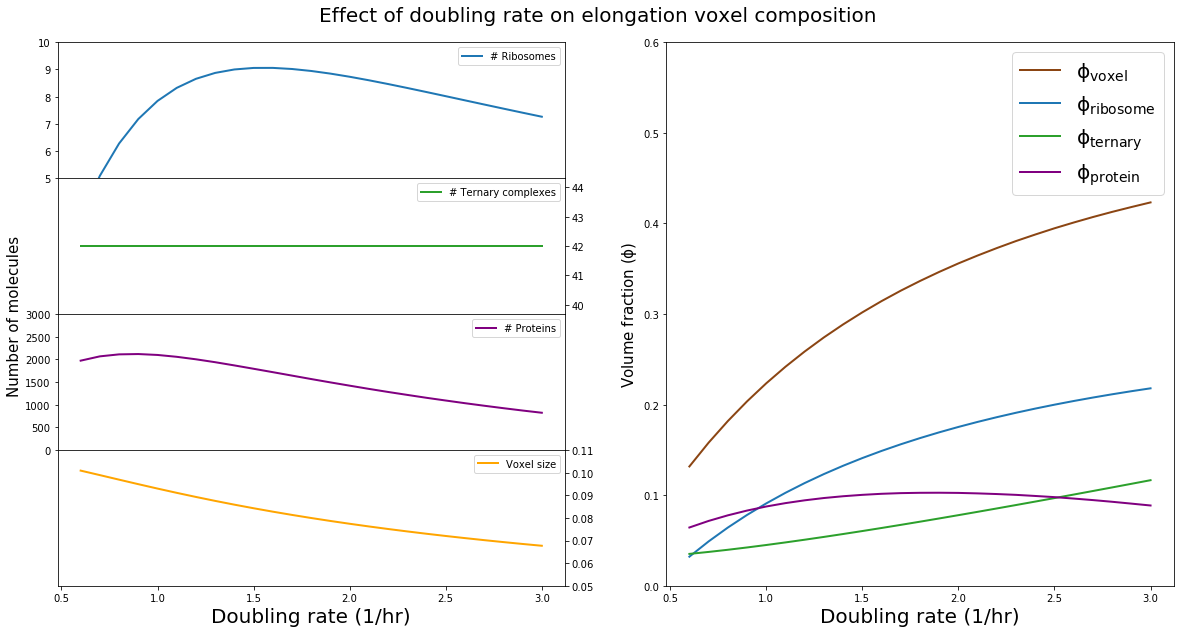

In [14]:
from matplotlib.font_manager import FontProperties

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax = plt.subplots(4,2,sharex=True,figsize=(20,10))
ax1 = plt.subplot2grid((1, 2), (0, 1), rowspan=1)

###Left hand plot
ax[0][0].plot(dbl_rate[6:31],rib_num[6:31],label='# Ribosomes',color=colors[0],linewidth=2)
ax[0][0].set_ylim(5,10)

ax[1][0].plot(dbl_rate[6:31],tern_num[6:31],label='# Ternary complexes',color=colors[2],linewidth=2)
ax[1][0].yaxis.tick_right()


ax[2][0].plot(dbl_rate[6:31],crowder_num[6:31],label='# Proteins',color='purple',linewidth=2)
ax[2][0].set_ylim(0,3000)


ax[3][0].plot(dbl_rate[6:31],vox_len[6:31],label='Voxel size',color='orange',linewidth=2)
ax[3][0].yaxis.tick_right()
ax[3][0].set_ylim(0.05,0.11)


ax[0][0].legend(prop={'size':10})
ax[1][0].legend(prop={'size':10})
ax[2][0].legend(prop={'size':10})
ax[3][0].legend(prop={'size':10})

fig.subplots_adjust(hspace=0)

ax[3][0].set_xlabel("Doubling rate (1/hr)",fontsize=20)
fig.suptitle("Effect of doubling rate on elongation voxel composition",y=0.93,fontsize=20)
fig.text(0.09, 0.5, 'Number of molecules', va='center', rotation='vertical',fontsize=15)


###Right hand plot
ax1.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='saddlebrown',linewidth=2)
ax1.plot(dbl_rate[6:31],rib_volfrac[6:31],label=r'$\mathregular{\phi_{ ribosome}}$',linewidth=2)
ax1.plot(dbl_rate[6:31],tern_volfrac[6:31],label=r'$\mathregular{\phi_{ ternary}}$',color=colors[2],linewidth=2)
ax1.plot(dbl_rate[6:31],crowder_volfrac[6:31],label=r'$\mathregular{\phi_{ protein}}$',color='purple',linewidth=2)
#ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.1),ncol=1,prop={'size':20})
ax1.legend(prop={'size':20})
ax1.set_xlabel("Doubling rate (1/hr)",fontsize=20)
ax1.set_ylabel("Volume fraction ($\mathregular{\phi}$)",fontsize=15)
ax1.set_ylim(0,0.6)


(0, 0.5)

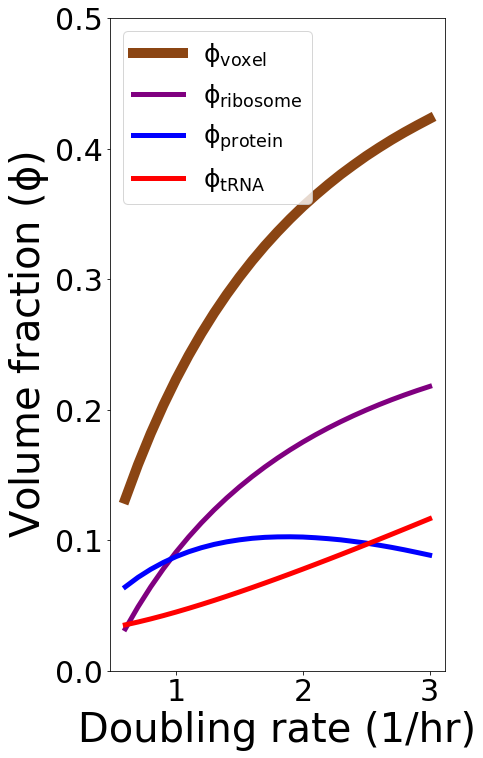

In [15]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(6,12))

ax1.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='saddlebrown',linewidth=10)
ax1.plot(dbl_rate[6:31],rib_volfrac[6:31],label=r'$\mathregular{\phi_{ ribosome}}$',color='purple',linewidth=5)
ax1.plot(dbl_rate[6:31],crowder_volfrac[6:31],label=r'$\mathregular{\phi_{ protein}}$',color='blue',linewidth=5)

ax1.plot(dbl_rate[6:31],tern_volfrac[6:31],label=r'$\mathregular{\phi_{ tRNA}}$',color='red',linewidth=5)
#ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.1),ncol=1,prop={'size':20})
ax1.legend(prop={'size':25})
ax1.set_xlabel("Doubling rate (1/hr)",fontsize=40)
ax1.set_ylabel("Volume fraction ($\mathregular{\phi}$)",fontsize=40)
ax1.tick_params(axis='both', which='major', labelsize=30)

ax1.set_ylim(0,0.5)



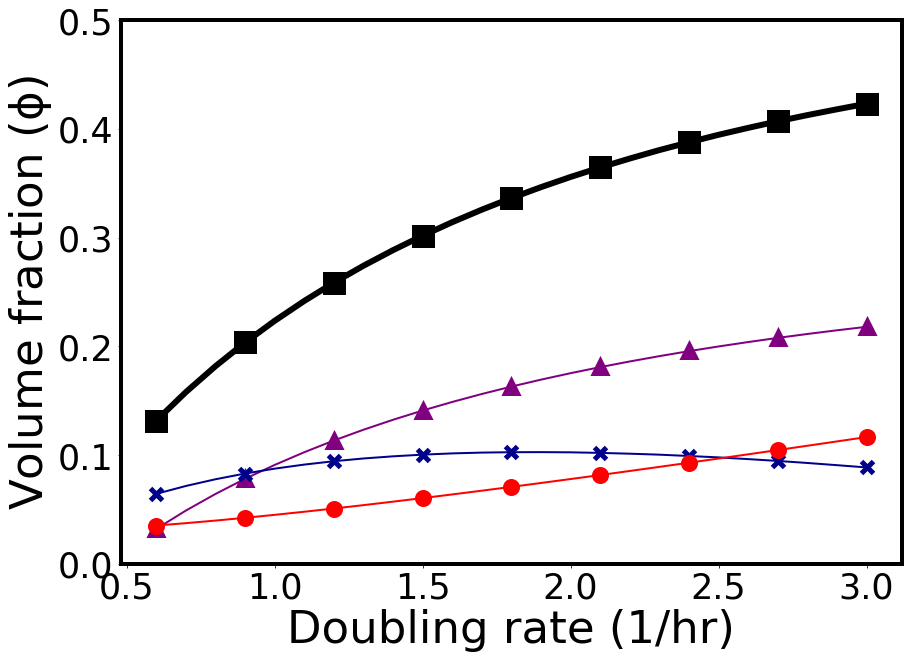

In [16]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(14,10))

ax1.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='black',marker='s',markersize=18,markeredgewidth=5,linewidth=6,markevery=3)
ax1.plot(dbl_rate[6:31],rib_volfrac[6:31],label=r'$\mathregular{\phi_{ ribosome}}$',color='purple',marker='^',markersize=12,markeredgewidth=5,linewidth=2,markevery=3)
ax1.plot(dbl_rate[6:31],crowder_volfrac[6:31],label=r'$\mathregular{\phi_{ protein}}$',color='darkblue',marker='x',markersize=12,markeredgewidth=5,linewidth=2,markevery=3)

ax1.plot(dbl_rate[6:31],tern_volfrac[6:31],label=r'$\mathregular{\phi_{ tRNA}}$',color='red',marker='o',markersize=12,markeredgewidth=5,linewidth=2,markevery=3)
#ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.1),ncol=1,prop={'size':20})
#ax1.legend(prop={'size':25})
ax1.set_xlabel("Doubling rate (1/hr)",fontsize=45)
ax1.set_ylabel("Volume fraction ($\mathregular{\phi}$)",fontsize=45)
ax1.tick_params(axis='both', which='major', labelsize=35)

ax1.set_ylim(0,0.5)
ax1.spines['right'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)
ax1.spines['top'].set_linewidth(4)
ax1.spines['bottom'].set_linewidth(4)


#ax1.spines['bottom'].set_visible(False)
#ax1.get_xaxis().set_visible(False)


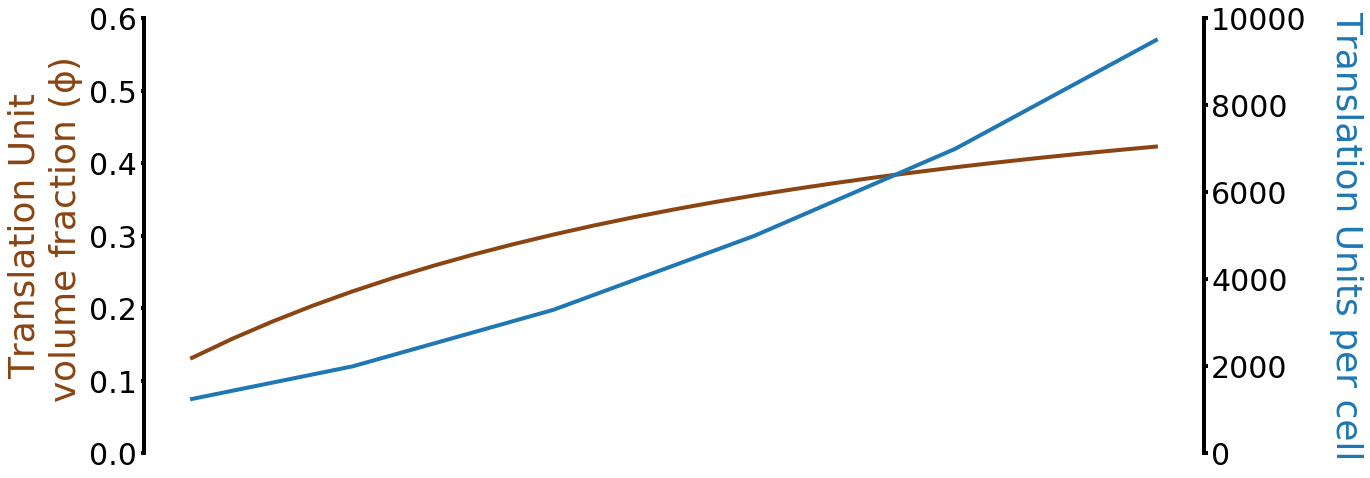

In [17]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(19,8))

ax1.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='saddlebrown',linewidth=4)

ax1.set_ylabel("Translation Unit\n volume fraction ($\mathregular{\phi}$)",fontsize=36,color='saddlebrown')
ax1.tick_params(axis='both', which='major', width=4,labelsize=30)

ax1.set_ylim(0,0.6)


ax2 = ax1.twinx()
ax2.set_ylabel("Translation Units per cell",fontsize=36,rotation=270,color='C0')
ax2.tick_params(axis='both', which='major',width=4, labelsize=30)
ax2.yaxis.set_label_coords(1.15, 0.5) 
#ax1.yaxis.set_label_coords(-0.05, 0.5) 

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)
ax1.get_xaxis().set_visible(False)
ax2.set_ylim(0,10000)


ax2.plot([0.6,1.0,1.5,2,2.5,3.0],[1250,2000,3300,5000,7000,9500], color='C0',linewidth=4)

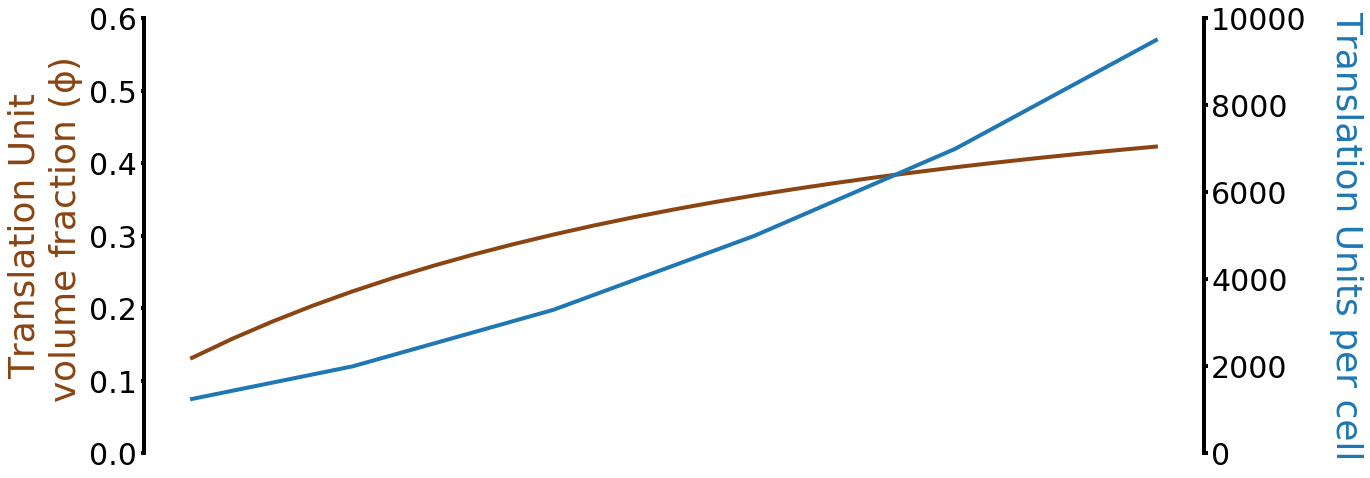

In [18]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(19,8))

ax1.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='saddlebrown',linewidth=4)

ax1.set_ylabel("Translation Unit\n volume fraction ($\mathregular{\phi}$)",fontsize=36,color='saddlebrown')
ax1.tick_params(axis='both', which='major', width=4,labelsize=30)

ax1.set_ylim(0,0.6)


ax2 = ax1.twinx()
ax2.set_ylabel("Translation Units per cell",fontsize=36,rotation=270,color='C0')
ax2.tick_params(axis='both', which='major',width=4, labelsize=30)
ax2.yaxis.set_label_coords(1.15, 0.5) 
#ax1.yaxis.set_label_coords(-0.05, 0.5) 

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)
ax1.get_xaxis().set_visible(False)
ax2.set_ylim(0,10000)


ax2.plot([0.6,1.0,1.5,2,2.5,3.0],[1250,2000,3300,5000,7000,9500], color='C0',linewidth=4)

In [19]:
from analysis_parameters import *
%load_ext autoreload
%autoreload

gr=[6,10,15,20,25,30]
for i in gr:
    print("\nDoubling rate: ", dbl_rate[i])
    print("Number of ribs in cell: ",f_rib(dbl_rate[i]
                                          
                                          ))
    print("Number of tern in cell: ",f_tern(dbl_rate[i]))
    print("Cell mass: ",f_mass(dbl_rate[i]))
    adj_mass = f_mass(dbl_rate[i])-f_rib(dbl_rate[i])*(2300*1.66E-21*1000000000000000)-f_tern(dbl_rate[i])*((25+0.11+43.2+0.523)*1.66E-21*1000000000000000)
    print("Cell mass-tern-rib: ",adj_mass)
    cr_num =  adj_mass/(28.5*1.66E-21*1000000000000000)
    print("Crowder num: ", cr_num)
    print("Voxel,num ribs: ",(f_rib(dbl_rate[i])/f_tern(dbl_rate[i])*42)/(1-f_nuc(dbl_rate[i])))
    print("Voxel,num crowder: ",(cr_num/f_tern(dbl_rate[i])*42))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Doubling rate:  0.6000000000000001
Number of ribs in cell:  4023.7903225806112
Number of tern in cell:  56695.826249744656
Cell mass:  147.48769262591782
Cell mass-tern-rib:  125.64663845261224
Crowder num:  2655815.6510803686
Voxel,num ribs:  3.5431368807732384
Voxel,num crowder:  1967.415676314936

Doubling rate:  1.0
Number of ribs in cell:  13669.919354838676
Number of tern in cell:  86090.33796797074
Cell mass:  265.03962147067944
Cell mass-tern-rib:  203.0109480265455
Crowder num:  4291079.011341059
Voxel,num ribs:  7.839397087914902
Voxel,num crowder:  2093.444197458906

Doubling rate:  1.5
Number of ribs in cell:  25727.58064516126
Number of tern in cell:  138388.56505951556
Cell mass:  392.9807736063709
Cell mass-tern-rib:  278.9402085392341
Crowder num:  5896009.480854663
Voxel,num ribs:  9.05323563363545
Voxel,num crowder:  1789.3992765182495

Doubling rate:  2.0
Number of ribs in cell: 

Doubling rate:  0.6000000000000001
Voxel length:  0.1008553156299825
Ribosome number:  3.5431368807732384
Ternary complex number  42
Crowder number  1970.0
Crowder vol frac  0.06434998409146828


Doubling rate:  1.0
Voxel length:  0.09292614340673645
Ribosome number:  7.839397087914902
Ternary complex number  42
Crowder number  2096.0
Crowder vol frac  0.08752983986220697


Doubling rate:  1.5
Voxel length:  0.08424111219214989
Ribosome number:  9.05323563363545
Ternary complex number  42
Crowder number  1791.0
Crowder vol frac  0.10039264723107891


Doubling rate:  2.0
Voxel length:  0.07738620566244644
Ribosome number:  8.728526590655433
Ternary complex number  42
Crowder number  1418.0
Crowder vol frac  0.10253311875190417


Doubling rate:  2.5
Voxel length:  0.07199644075126958
Ribosome number:  8.01377633645752
Ternary complex number  42
Crowder number  1090.0
Crowder vol frac  0.09787505368673738


Doubling rate:  3.0
Voxel length:  0.06767802200013741
Ribosome number:  7.2580975

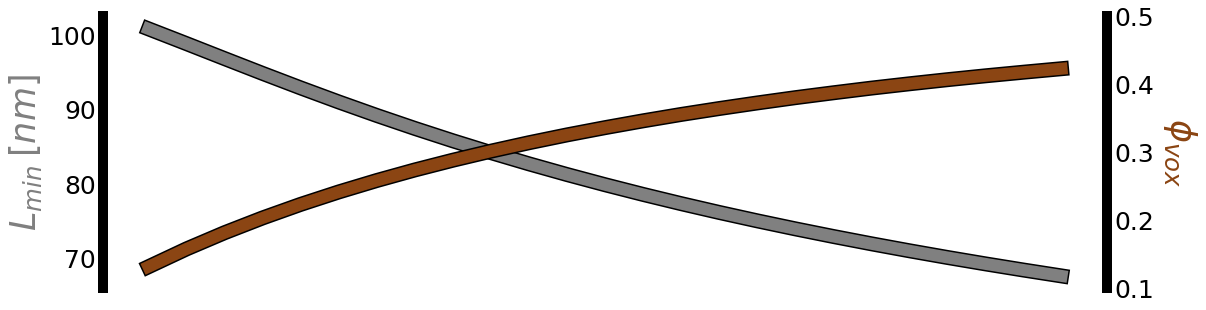

In [20]:
gr=np.array([6,10,15,20,25,30])
for i in gr:
    print("Doubling rate: ", dbl_rate[i])
    print("Voxel length: ", vox_len[i])
    print("Ribosome number: ", rib_num[i])
    print("Ternary complex number ",tern_num[i])
    print("Crowder number ", crowder_num[i])
    print('Crowder vol frac ', crowder_volfrac[i])
    print("\n")
print(np.array(vox_len)[gr])
print(np.array(total_volfrac)[gr])

fig, ax = plt.subplots(1,1,figsize=(18,5))

gr = np.arange(6,31,1)
ax.plot(gr/10,np.array(vox_len)[gr]*1000,c='black',linewidth=15,zorder=0)#marker='x',markersize=10,markeredgewidth=10)
ax.plot(gr/10,np.array(vox_len)[gr]*1000,c='grey',linewidth=12,zorder=1)#marker='x',markersize=10,markeredgewidth=10)

ax.set_ylabel('$L_{min}\:[nm]$',size=35,color='grey')

ax2 = ax.twinx()
ax2.plot(gr/10,np.array(total_volfrac)[gr],c='black',linewidth=15,zorder=2)
ax2.plot(gr/10,np.array(total_volfrac)[gr],c='saddlebrown',linewidth=12,zorder=3)

ax.tick_params(axis='both', which='major',width=4, labelsize=25)
ax2.tick_params(axis='both', which='major',width=4, labelsize=25)
ax2.set_ylim(0.1,0.5)
ax2.set_ylabel('$\phi_{vox}$',size=35,labelpad=45,rotation=270,color='saddlebrown')

ax.spines['right'].set_linewidth(10)
ax.spines['left'].set_linewidth(10)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.get_xaxis().set_visible(False)

#ax2.set_ylabel("Translation Units per cell",fontsize=36,rotation=270,color='C0')


Doubling rate:  0.6000000000000001
Voxel length:  0.1008553156299825
Ribosome number:  3.5431368807732384
Ternary complex number  42
Crowder number  1970.0
Crowder vol frac  0.06434998409146828
rib vol frac 0.03215227415651316
Total vol frac 0.13172292360802645


Doubling rate:  1.0
Voxel length:  0.09292614340673645
Ribosome number:  7.839397087914902
Ternary complex number  42
Crowder number  2096.0
Crowder vol frac  0.08752983986220697
rib vol frac 0.09094714428745457
Total vol frac 0.22350472873485527


Doubling rate:  1.5
Voxel length:  0.08424111219214989
Ribosome number:  9.05323563363545
Ternary complex number  42
Crowder number  1791.0
Crowder vol frac  0.10039264723107891
rib vol frac 0.1409781127750757
Total vol frac 0.3018103707556111


Doubling rate:  2.0
Voxel length:  0.07738620566244644
Ribosome number:  8.728526590655433
Ternary complex number  42
Crowder number  1418.0
Crowder vol frac  0.10253311875190417
rib vol frac 0.17533572924895038
Total vol frac 0.355834492803

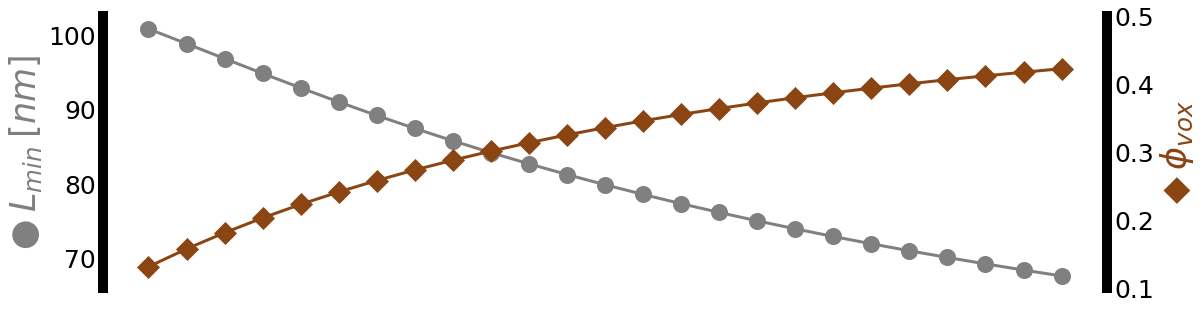

In [21]:
gr=np.array([6,10,15,20,25,30])
for i in gr:
    print("Doubling rate: ", dbl_rate[i])
    print("Voxel length: ", vox_len[i])
    print("Ribosome number: ", rib_num[i])
    print("Ternary complex number ",tern_num[i])
    print("Crowder number ", crowder_num[i])
    print('Crowder vol frac ', crowder_volfrac[i])
    print('rib vol frac', rib_volfrac[i])
    print('Total vol frac', total_volfrac[i])
    print("\n")
print(np.array(vox_len)[gr])
print(np.array(total_volfrac)[gr])

fig, ax = plt.subplots(1,1,figsize=(18,5))

gr = np.arange(6,31,1)
#ax.plot(gr/10,np.array(vox_len)[gr]*1000,c='black',linewidth=15,zorder=0)#marker='x',markersize=10,markeredgewidth=10)
ax.plot(gr/10,np.array(vox_len)[gr]*1000,c='grey',linewidth=3,zorder=1,marker='o',markersize=12,markeredgewidth=5)

ax.set_ylabel('$\u25CF\:L_{min}\:[nm] $',size=35,color='grey')

ax2 = ax.twinx()
#ax2.plot(gr/10,np.array(total_volfrac)[gr],c='black',linewidth=15,zorder=2)
ax2.plot(gr/10,np.array(total_volfrac)[gr],c='saddlebrown',linewidth=3,zorder=3,marker='D',markersize=12,markeredgewidth=5)

ax.tick_params(axis='both', which='major',width=4, labelsize=25)
ax2.tick_params(axis='both', which='major',width=4, labelsize=25)
ax2.set_ylim(0.1,0.5)
ax2.set_ylabel('$\u25C6\:\phi_{vox}$',size=35,color='saddlebrown')

ax.spines['right'].set_linewidth(10)
ax.spines['left'].set_linewidth(10)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.get_xaxis().set_visible(False)

#ax2.set_ylabel("Translation Units per cell",fontsize=36,rotation=270,color='C0')

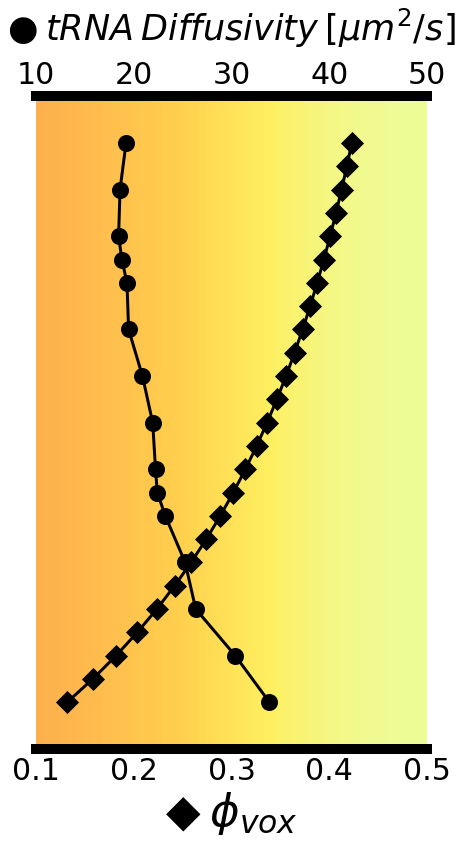

In [22]:
fig, ax = plt.subplots(1,1,figsize=(7,12))
ax.autoscale(True)

gr = np.arange(6,31,1)
ax.set_xlim(0.1,0.5)
ax.set_ylim(0.4,3.2)

ax.imshow([[3,0], [3,0]], 
  cmap = plt.cm.Wistia, 
  interpolation = 'bicubic',
  extent=[0,0.5,0,3.2],alpha=0.7,aspect='auto'
)
ax.set_xlim(0.1,0.5)


ax.plot(np.array(total_volfrac)[gr],gr/10,c='black',linewidth=3,zorder=3,marker='D',markersize=12,markeredgewidth=5)

ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.set_xlabel('$\u25C6\:\phi_{vox}$',size=45,color='black')
ax.spines['top'].set_linewidth(10)
ax.spines['bottom'].set_linewidth(10)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.get_yaxis().set_visible(False)

ax2=ax.twiny()
D=[33.8804659,30.3781096,  26.33330652, 25.24978214, 23.21700184, 22.39614547,
 22.21761187, 21.92690297, 20.87998324, 19.46234456, 19.29173454, 18.77353947,
 18.43655941, 18.58178146 ,19.19679243]
gr_D=[0.6, 0.8, 1.,  1.2, 1.4, 1.5, 1.6, 1.8, 2. , 2.2 ,2.4 ,2.5 ,2.6 ,2.8 ,3. ]
ax2.set_xlabel('$\u25CF\:tRNA\:Diffusivity\:[µm^2/s] $',size=35,color='black',labelpad=20)
ax2.plot(D,gr_D,c='black',linewidth=3,zorder=1,marker='o',markersize=12,markeredgewidth=5)

ax2.set_xlim(10,50)
ax2.spines['top'].set_linewidth(10)
ax2.spines['bottom'].set_linewidth(10)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', which='major',width=4, labelsize=30)

#ax2.plot([25,25],[0,3.2],color='orange',linewidth=7,linestyle='dashed')




#ax2.set_ylabel("Translation Units per cell",fontsize=36,rotation=270,color='C0')


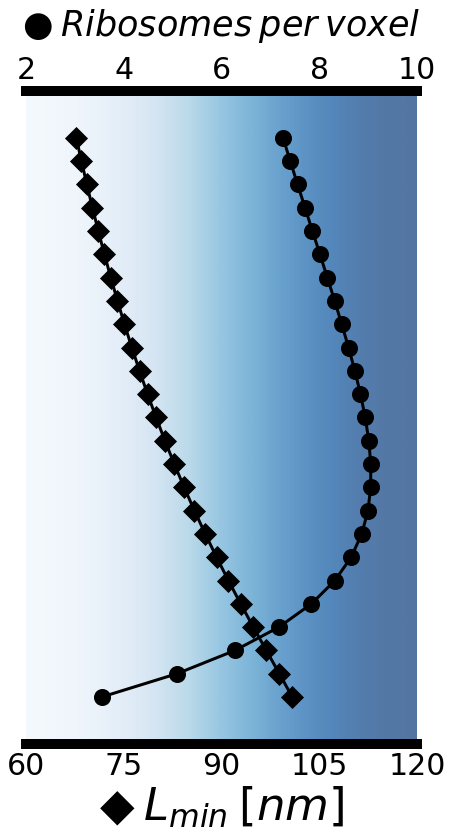

In [23]:
fig, ax = plt.subplots(1,1,figsize=(7,12))
ax.autoscale(True)

gr = np.arange(6,31,1)
ax.set_xlim(0.1,0.5)
ax.set_ylim(0.4,3.2)

ax.imshow([[0,3], [0,3]], 
  cmap = plt.cm.Blues, 
  interpolation = 'bicubic',
  extent=[60,120,0,3.2],alpha=0.7,aspect='auto'
)
ax.set_xlim(60,120)


ax.plot(np.array(vox_len)[gr]*1000,gr/10,c='black',linewidth=3,zorder=3,marker='D',markersize=12,markeredgewidth=5)

ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.set_xlabel('$\u25C6\:L_{min}\:[nm] $',size=45,color='black')
ax.spines['top'].set_linewidth(10)
ax.spines['bottom'].set_linewidth(10)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.get_yaxis().set_visible(False)
ax.set_xticks(np.arange(60,120.1,15))

ax2=ax.twiny()

ax2.set_xlabel('$\u25CF\:Ribosomes\: per\: voxel $',size=35,color='black',labelpad=20)
ax2.plot(np.array(rib_num)[gr],gr/10,c='black',linewidth=3,zorder=1,marker='o',markersize=12,markeredgewidth=5)

ax2.set_xlim(2,10)
ax2.spines['top'].set_linewidth(10)
ax2.spines['bottom'].set_linewidth(10)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', which='major',width=4, labelsize=30)
ax2.set_xticks(np.arange(2,10.1,2))


#ax2.plot([25,25],[0,3.2],color='orange',linewidth=7,linestyle='dashed')




#ax2.set_ylabel("Translation Units per cell",fontsize=36,rotation=270,color='C0')


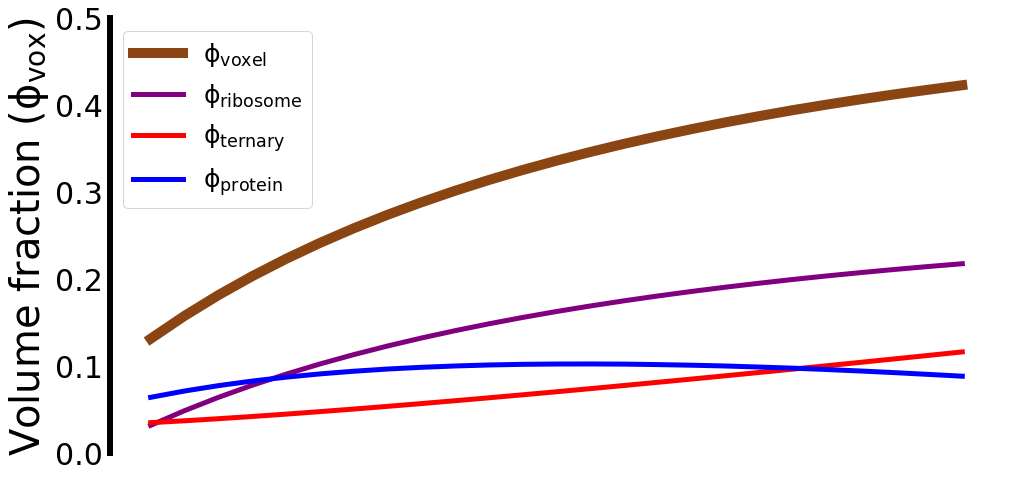

In [24]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(16,8))

ax1.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='saddlebrown',linewidth=10)
ax1.plot(dbl_rate[6:31],rib_volfrac[6:31],label=r'$\mathregular{\phi_{ ribosome}}$',color='purple',linewidth=5)
ax1.plot(dbl_rate[6:31],tern_volfrac[6:31],label=r'$\mathregular{\phi_{ ternary}}$',color='red',linewidth=5)
ax1.plot(dbl_rate[6:31],crowder_volfrac[6:31],label=r'$\mathregular{\phi_{ protein}}$',color='blue',linewidth=5)
#ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.1),ncol=1,prop={'size':20})
ax1.legend(prop={'size':25})
ax1.set_xlabel("Doubling rate (1/hr)",fontsize=40)
ax1.set_ylabel("Volume fraction ($\mathregular{\phi_{vox}}$)",fontsize=40)
ax1.tick_params(axis='both', which='major', labelsize=30)

ax1.set_ylim(0,0.5)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.spines['left'].set_linewidth(6)

#ax2 = ax1.twinx()
#ax2.spines['bottom'].set_visible(False)
#ax2.spines['top'].set_visible(False)
#ax2.spines['right'].set_linewidth(6)
#ax2.tick_params(axis='both', which='major', labelsize=30)
#ax2.plot(dbl_rate[6:31],vox_len[6:31],color='black',linewidth=5)
#ax2.set_ylabel("Volume fraction ($\mathregular{\phi}$)",fontsize=40)



In [25]:
total_volfrac[30]

0.4231760391314747

[19.92826913 26.98321861 31.48135878 32.42546753 31.77984118 28.8861933 ]


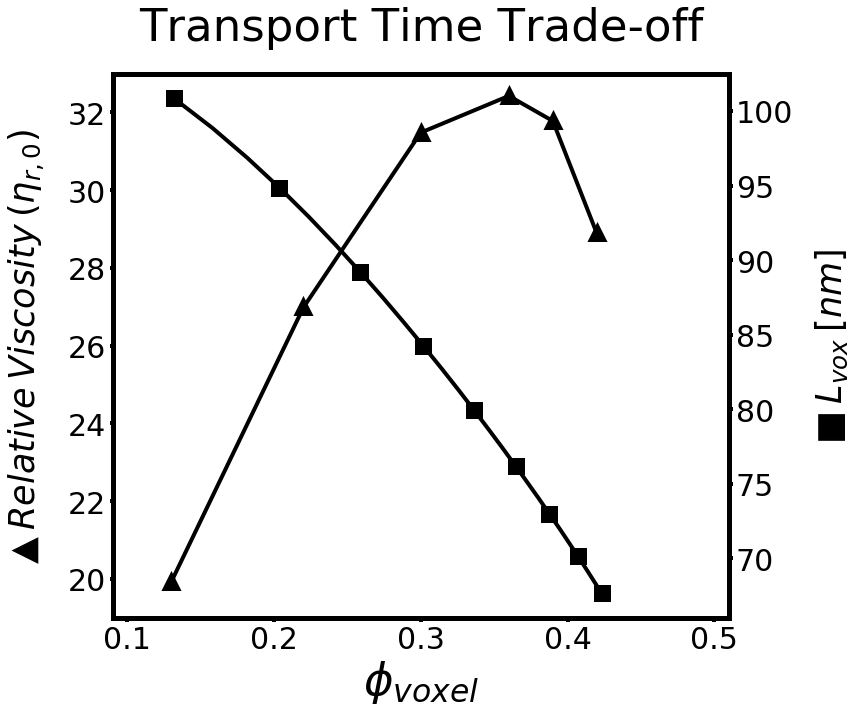

In [69]:
fig, ax2 = plt.subplots(1,1,figsize=(12,10))
ax = ax2.twinx()

#ax.plot([0.6,1.0,1.5,2.0,2.5,3.0],[0.04838136,0.04265897, 0.03725069, 0.03248931, 0.02949553, 0.02696354])
total_volfrac=np.array(total_volfrac)
vox_len=np.array(vox_len)
ax.plot(total_volfrac[6:31],vox_len[6:31]*1000,marker='s',markersize=12,markeredgewidth=5,markevery=3,linewidth=4,color='black')
ax.set_ylabel('$\u25A0\:L_{vox}\:[nm] $',size=35,color='black',labelpad=20)
ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.set_xlim(0.09,0.51)
ax2.set_xlabel('$\phi_{voxel}$',size=45,color='black')


strain = np.array([0.64230365, 0.47436891, 0.40658982,  0.39475144, 0.40277105, 0.44311827])/40
viscosity=0.32/strain
print(viscosity)
phi_list = [0.13,0.22,0.30,0.36,0.39,0.42]


ax2.plot([0.6,1.0,1.5,2.0,2.5,3.0],[1,2,3,4,10,20])
ax2.tick_params(axis='both', which='major',width=4, labelsize=30)
ax2.set_ylabel('$\u25B2\: Relative\: Viscosity\:(η_{r,0})$',size=35,color='black',labelpad=20)
#ax2.plot([0.1,0.2,0.3,0.4,0.423],[1.2533, 1.556,2.15,9.925,13],marker='^',markersize=12,markeredgewidth=5,linewidth=2,color='black')
ax2.plot(phi_list,viscosity,marker='^',markersize=12,markeredgewidth=5,linewidth=4,color='black')
ax2.set_ylim(19,33)
#ax2.set_xticks(np.arange(2,10.1,2))

ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)

ax.set_title('Transport Time Trade-off',size=45,y=1.05)

#ax[1].plot([0.6,1.0,1.5,2.0,2.5,3.0],[0.7,0.6,0.5,0.4,0.3,0.2])
#ax3 = ax[1].twinx()
#ax3.plot(gr/10,np.array(rib_num)[gr],c='black',linewidth=3,zorder=1,marker='^',markersize=12,markeredgewidth=5)

plt.tight_layout()


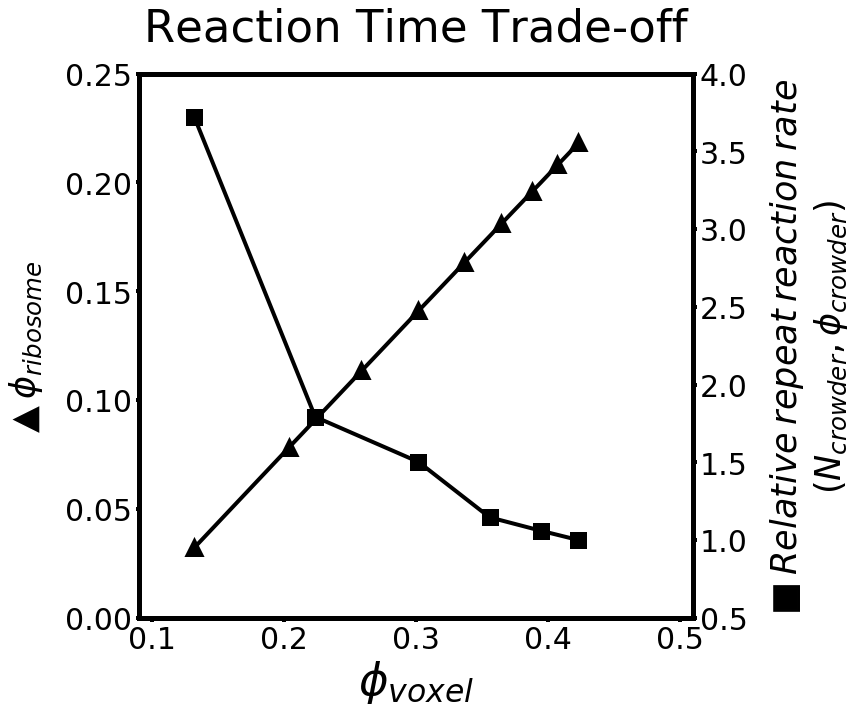

In [68]:
fig, ax2 = plt.subplots(1,1,figsize=(12,10))
ax = ax2.twinx()

total_volfrac=np.array(total_volfrac)
vox_len=np.array(vox_len)
ax2.plot(total_volfrac[6:31],rib_volfrac[6:31],marker='^',markersize=12,markeredgewidth=5,markevery=3,linewidth=4,color='black')
ax2.set_ylabel('$\u25B2\\: \phi_{ribosome}$',size=35,color='black',labelpad=20)
ax2.tick_params(axis='both', which='major',width=4, labelsize=30)
ax2.set_xlim(0.09,0.51)
ax2.set_ylim(0,0.25)

ax2.set_xlabel('$\phi_{voxel}$',size=45,color='black')
ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.set_ylabel('$\u25A0\:Relative\:repeat\:reaction\:rate$'+'\n'+'$(N_{crowder},\phi_{crowder})$',size=35,color='black',labelpad=20)
ax.plot(total_volfrac[[6,10,15,20,25,30]],np.array([21.17668825161887,
 10.196348884381338,
 8.549512036434614,
 6.520406375897705,
 6.031409285025486,
 5.689668195306178])/5.689668195306178,marker='s',markersize=12,markeredgewidth=5,linewidth=4,color='black')
ax.set_ylim(0.5,4)
#ax2.set_xticks(np.arange(2,10.1,2))

ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)

ax.set_title('Reaction Time Trade-off',size=45,y=1.05)

#ax[1].plot([0.6,1.0,1.5,2.0,2.5,3.0],[0.7,0.6,0.5,0.4,0.3,0.2])
#ax3 = ax[1].twinx()
#ax3.plot(gr/10,np.array(rib_num)[gr],c='black',linewidth=3,zorder=1,marker='^',markersize=12,markeredgewidth=5)

plt.tight_layout()

[0.13172292 0.22350473 0.30181037 0.35583449 0.3945994  0.42317604]


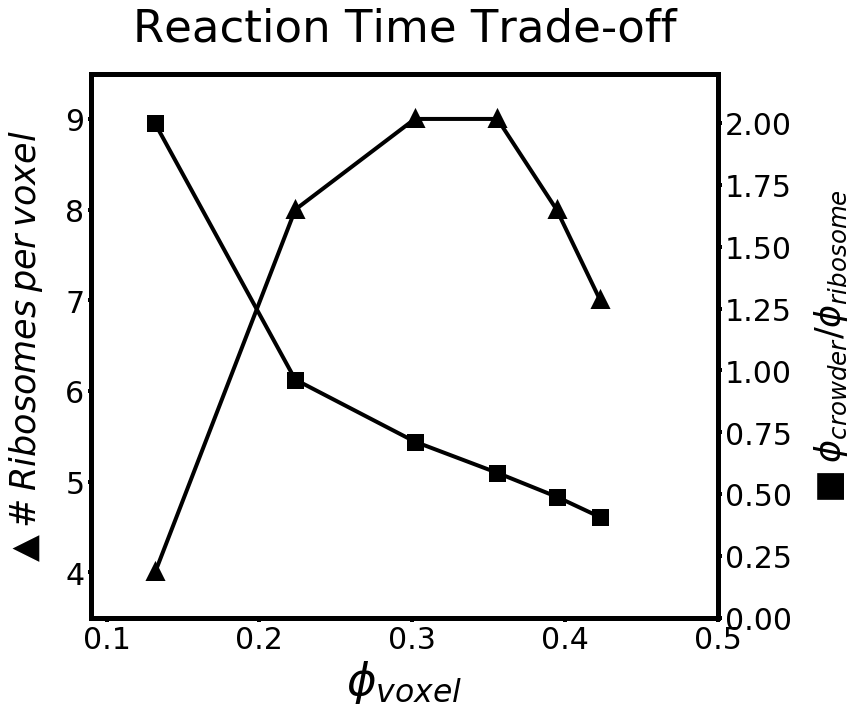

In [90]:
fig, ax2 = plt.subplots(1,1,figsize=(12,10))
ax = ax2.twinx()

total_volfrac=np.array(total_volfrac)
vox_len=np.array(vox_len)
ax2.plot(total_volfrac[[6,10,15,20,25,30]],[4,8,9,9,8,7],marker='^',markersize=12,markeredgewidth=5,linewidth=4,color='black')
ax2.set_ylabel('$\u25B2\\: \# \:Ribosomes \:per \:voxel$',size=35,color='black',labelpad=20)
ax2.tick_params(axis='both', which='major',width=4, labelsize=30)
ax2.set_xlim(0.09,0.5)
ax2.set_ylim(3.5,9.5)
print(total_volfrac[[6,10,15,20,25,30]])

ax2.set_xlabel('$\phi_{voxel}$',size=45,color='black')
ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.set_ylabel('$\u25A0\:\phi_{crowder}/\phi_{ribosome}$',size=35,color='black',labelpad=20)
#ax.plot(total_volfrac[[6,10,15,20,25,30]],np.array([0.06434998409146828/4,0.08752983986220697/8,0.10039264723107891/9,0.10253311875190417/9,0.09787505368673738/8,0.0886440269099349/7]),marker='s',markersize=12,markeredgewidth=5,linewidth=4,color='black')
ax.plot(total_volfrac[[6,10,15,20,25,30]],np.array([0.06434998409146828/0.0322,0.08752983986220697/0.0909,0.10039264723107891/0.141,0.10253311875190417/0.175,0.09787505368673738/0.200,0.0886440269099349/0.218]),marker='s',markersize=12,markeredgewidth=5,linewidth=4,color='black')

#0.0322, 0.0909, 0.141, 0.175, 0.200, 0.218
ax.set_ylim(0,2.2)

ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)

ax.set_title('Reaction Time Trade-off',size=45,y=1.05)

#ax[1].plot([0.6,1.0,1.5,2.0,2.5,3.0],[0.7,0.6,0.5,0.4,0.3,0.2])
#ax3 = ax[1].twinx()
#ax3.plot(gr/10,np.array(rib_num)[gr],c='black',linewidth=3,zorder=1,marker='^',markersize=12,markeredgewidth=5)

plt.tight_layout()

Text(0.5, 1.05, 'Empirical elongation times')

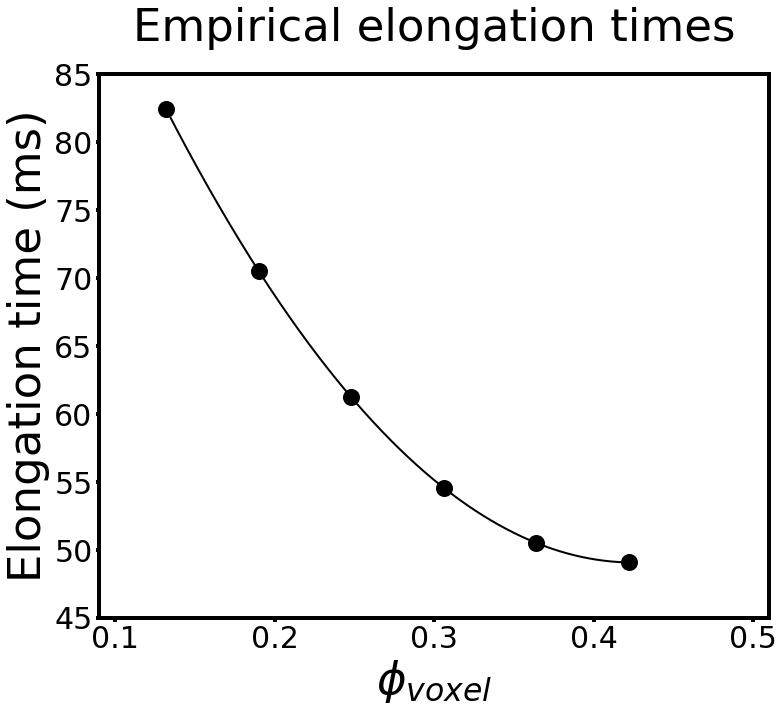

In [92]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
x=total_volfrac[[6,10,15,20,25,30]]
y_model,SS_err,_,_,_ = np.polyfit(x,[1000/12,1000/16,1000/18,1000/19,1000/20,1000/21],2,full=True)
y_hat = np.polyval(y_model,x)
x_sweep_i = np.linspace(min(x),max(x),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,marker='o',markersize=12,markeredgewidth=5,markevery=199,linewidth=2,color='black')
ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.set_xlim(0.09,0.51)
ax.set_ylim(45,85)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('$\phi_{voxel}$',size=45,color='black')
ax.set_ylabel('Elongation time (ms)',size=45,color='black')
ax.set_title('Empirical elongation times',size=45,y=1.05)


In [ ]:
total_volfrac[[6,10,15,20,25,30]]

In [ ]:
fig, ax2 = plt.subplots(1,1,figsize=(12,10))
ax = ax2.twinx()

#ax.plot([0.6,1.0,1.5,2.0,2.5,3.0],[0.04838136,0.04265897, 0.03725069, 0.03248931, 0.02949553, 0.02696354])
total_volfrac=np.array(total_volfrac)
vox_len=np.array(vox_len)
#ax.plot(total_volfrac[6:31],vox_len[6:31],marker='^',markersize=12,markeredgewidth=5,markevery=3,linewidth=2,color='black')
ax.set_ylabel('$\u25B2\: Relative\: unique\:collision\: rate$'+'\n' +'$(N_{rib}, \phi_{rib})$',size=35,color='black',labelpad=20)
ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.set_xlim(0.09,0.51)
ax2.set_xlabel('$\phi_{vox}$',size=45,color='black')

ax2.tick_params(axis='both', which='major',width=4, labelsize=30)
ax2.set_ylabel('$Elongation\:Time$',size=35,color='black',labelpad=20)
ax2.plot(total_volfrac[[6,30]],[89,59],marker='s',markersize=12,markeredgewidth=5,linewidth=2,color='black')
ax2.set_ylim(55,90)
#ax2.set_xticks(np.arange(2,10.1,2))

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

ax.set_title('Elongation Time Trade-off',size=45,y=1.05)

#ax[1].plot([0.6,1.0,1.5,2.0,2.5,3.0],[0.7,0.6,0.5,0.4,0.3,0.2])
#ax3 = ax[1].twinx()
#ax3.plot(gr/10,np.array(rib_num)[gr],c='black',linewidth=3,zorder=1,marker='^',markersize=12,markeredgewidth=5)

plt.tight_layout()

In [ ]:
gr=np.array([6,8,10,12,14,15,16,18,20,22,24,25,26,28,30])
crowders = list()
ribs = list()

side_len = list()
for i in gr:
    print(i)
    crowders.append(int(np.round(crowder_num[i])))
    ribs.append(int(np.round(rib_num[i])))
    side_len.append(vox_len[i])

crowders = ','.join(map(str, crowders)) 
ribs = ','.join(map(str, ribs)) 
side_len = ','.join(map(str, side_len)) 
print('[',crowders,']')
print('[',ribs,']')
print('[',side_len,']')


In [ ]:
gr=[0,16,37,58,78,99]
adj = (vox_len[gr[1]]**3)/np.array([vox_len[gr[0]]**3,vox_len[gr[1]]**3,vox_len[gr[2]]**3,vox_len[gr[3]]**3,vox_len[gr[4]]**3,vox_len[gr[5]]**3])
print(adj)
j=0
for i in gr:
    print(dbl_rate[i],rib_num[i]*adj[j])
    print(dbl_rate[i],tern_num[i]*adj[j])
    print(dbl_rate[i],crowder_num[i]*adj[j])
    print("\n")
    j+=1

In [ ]:
print(0*(4/3*3.14159265*(0.0025)**3)/(vox_len[-1]**3))
print(142*(4/3*3.14159265*(0.0025)**3)/(vox_len[-1]**3))
print(284*(4/3*3.14159265*(0.0025)**3)/(vox_len[-1]**3))
print(426*(4/3*3.14159265*(0.0025)**3)/(vox_len[-1]**3))


In [ ]:
(vox_len[1]**3)/(vox_len[5]**3)

In [ ]:
vox_len[5]

In [ ]:
for i in gr:
    print(f_vol(dbl_rate[i])/vox_len[i]**3)

In [ ]:
#Translation units calculation

gr=[0,16,37,58,78,99]
gr = [0.6,1.0,1.5,2,2.5,3.0]
for i in gr:
    #print("Doubling rate: ", dbl_rate[i])
    print("Cell volume: ", f_vol(i))
    print("Ternary complex number: ",f_tern(i))
    print("Cell volume for 42 ternary complexes: ", 42*f_vol(i)/f_tern(i))
    print("Cell volume for 42 ternary complexes normalized to growth rate = 1: ", 
          (42*f_vol(i)/f_tern(i))/(42*f_vol(1)/f_tern(1)))
    print("# Translation units for fixed voxel size: ", 
      (42*f_vol(1)/f_tern(1))/(42*f_vol(i)/f_tern(i)))

    print("\n")

In [ ]:
x = [0.6,1.0,1.5,2,2.5,3.0]
y_vol = [f_vol(i) for i in x]
y_tern = [f_tern(i) for i in x]
y_TU = [(42*f_vol(1)/f_tern(1))/(42*f_vol(i)/f_tern(i)) for i in x]

fig,ax = plt.subplots(1,1,figsize=(10,5))
#ax[0].scatter(x,y_vol)
#ax_2 = ax[0].twinx()
#ax_2.scatter(x,y_tern,color='orange')

ax.set_title("# of translation units per cytoplasmic volume\n increases linearly with growth rate",fontsize=20)
ax.set_ylabel("# Normalized translation units",fontsize=15)
ax.set_xlabel("Cell doubling rate",fontsize=15)
ax.scatter(x,y_TU)
TU_polyfit = np.polyfit(x,y_TU,1)
y_hat = np.polyval(TU_polyfit,x)
ax.plot(x, y_hat,color='black',linewidth=2)
ax.text(1,2,"$R^2$ ="+str(round(calc_R2(x,y_TU,y_hat),3)),fontsize=15)
ax.text(1,2.3,str("y= "+ str(round(TU_polyfit[0],2))+"x +" + str(round(TU_polyfit[1],2))),fontsize=15)


#ax[1].set_title("Ternary complex volume fraction\n increases linearly with growth rate",fontsize=20)
#ax[1].set_ylabel("Ternary complex volume fraction",fontsize=15)
#ax[1].set_xlabel("Cell doubling rate",fontsize=15)
#ax[1].scatter([dbl_rate[i] for i in [0,16,37,58,78,99]],[tern_volfrac[i] for i in [0,16,37,58,78,99]])
#tern_volfrac_polyfit = np.polyfit([dbl_rate[i] for i in [0,16,37,58,78,99]],[tern_volfrac[i] for i in [0,16,37,58,78,99]],1)
#y_hat = np.polyval(tern_volfrac_polyfit,dbl_rate)
#ax[1].plot(dbl_rate, y_hat,color='black',linewidth=2)
#ax[1].text(1,0.09,"$R^2$ ="+str(round(calc_R2(dbl_rate,tern_volfrac,y_hat),3)),fontsize=15)
#ax[1].text(1,0.102,str("y= "+ str(round(tern_volfrac_polyfit[0],2))+"x +" + str(round(tern_volfrac_polyfit[1],2))),fontsize=15)



In [ ]:
print([tern_volfrac[i] for i in [0,16,37,58,78,99]])

In [ ]:
print((42*(4/3*np.pi*0.0059**3))/(0.10085531562998254**3),
(42*(4/3*np.pi*0.0059**3))/(0.0931590137541811**3),
(42*(4/3*np.pi*0.0059**3))/(0.08428801064861997**3),
(42*(4/3*np.pi*0.0059**3))/(0.07731298830129535**3),
(42*(4/3*np.pi*0.0059**3))/(0.07208383375767162**3),
(42*(4/3*np.pi*0.0059**3))/(0.06767802200013744**3))

In [ ]:
print((1*(4/3*np.pi*0.0059**3))/(42/f_tern(0.6)*f_vol(0.6)),
(42*(4/3*np.pi*0.0059**3))/(42/f_tern(1)*f_vol(1)),
(42*(4/3*np.pi*0.0059**3))/(42/f_tern(1.5)*f_vol(1.5)),
(42*(4/3*np.pi*0.0059**3))/(42/f_tern(2)*f_vol(2)),
(42*(4/3*np.pi*0.0059**3))/(42/f_tern(2.5)*f_vol(2.5)),
(42*(4/3*np.pi*0.0059**3))/(42/f_tern(3)*f_vol(3)))


In [ ]:
print(
(f_tern(0.6)*(4/3*np.pi*0.0059**3))/(f_vol(0.6)),
(f_tern(1)*(4/3*np.pi*0.0059**3))/(f_vol(1)),
(f_tern(1.5)*(4/3*np.pi*0.0059**3))/(f_vol(1.5)),
(f_tern(2)*(4/3*np.pi*0.0059**3))/(f_vol(2)),
(f_tern(2.5)*(4/3*np.pi*0.0059**3))/(f_vol(2.5)),
(f_tern(3)*(4/3*np.pi*0.0059**3))/(f_vol(3)))



In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxels = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cuboids in the top left and bottom right corners, and a link between them

for i in range(10):
    for j in range(10):
        for k in range(20):
            u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
            x = i+np.cos(u)*np.sin(v)
            y = j+np.sin(u)*np.sin(v)
            z = k+np.cos(v)
            ax.plot_surface(x, y, z, color="r")



ax.set_xlim3d(0,20)
ax.set_ylim3d(0,20)
ax.set_zlim3d(0,20)
ax.set_axis_off()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cuboids in the top left and bottom right corners, and a link between them
crowder=0
for i in range(10):
    for j in range(20):
        for k in range(10):
            if(crowder<2000):
                crowder+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x = 2*np.cos(u)*np.sin(v)
                y = 2*np.sin(u)*np.sin(v)
                z = 2*np.cos(v)
                ax.plot_surface(4*i+x, 2+4*j+y, 2+4*k+z, color="navy",alpha=1)

tRNA=0
for k in range(4):
    for j in range(3,-1,-1):
        for i in range(4):
            if(tRNA<42):
                tRNA+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x = (5.9)*np.cos(u)*np.sin(v)
                y = (5.9)*np.sin(u)*np.sin(v)
                z = (5.9)*np.cos(v)
                c='r'
                if tRNA>33 and tRNA<=41:
                    c='y'
                elif tRNA>41:
                    c='g'
                ax.plot_surface(11.8*i+x, 5.9+11.8*j+y, 46+11.8*k+z, color=c)
ribosome=0
for k in range(2):
    for j in range(2,-1,-1):
        for i in range(1,-1,-1):
            if(ribosome<7):
                ribosome+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x =13*np.cos(u)*np.sin(v)
                y = 13*np.sin(u)*np.sin(v)
                z = 13*np.cos(v)
                ax.plot_surface(53+26*i+x, 13+26*j+y, 13+26*k+z, color="purple")
           

ax.view_init(20, -70)
ax.set_xlim3d(0,93)
ax.set_ylim3d(0,93)
ax.set_zlim3d(0,93)
#ax.set_xlabel('\n\n nm',size=30)
#ax.set_ylabel('\n\n nm',size=30)
#ax.set_zlabel('\n\n nm',size=30)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(labelbottom=False)    
ax.tick_params(labelleft=False)    
#ax.get_yaxis().set_ticks([])
#ax.zaxis.set_ticks([])
#ax.set_axis_off()

plt.savefig('deconstructedcell.png',transparent=True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")


tRNA=0
for k in range(4):
    for j in range(3,-1,-1):
        for i in range(4):
            if(tRNA<42):
                tRNA+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x = (5.9)*np.cos(u)*np.sin(v)
                y = (5.9)*np.sin(u)*np.sin(v)
                z = (5.9)*np.cos(v)
                c='r'
                if tRNA>33 and tRNA<=41:
                    c='y'
                elif tRNA>41:
                    c='g'
                ax.plot_surface(11.8*i+x, 5.9+11.8*j+y, 46+11.8*k+z, color=c)
ax.set_xlim3d(0,93)
ax.set_ylim3d(0,93)
ax.set_zlim3d(0,93)
ax.set_axis_off()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

ribosome=0
for k in range(2):
    for j in range(2,-1,-1):
        for i in range(1,-1,-1):
            if(ribosome<1):
                ribosome+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x =13*np.cos(u)*np.sin(v)
                y = 13*np.sin(u)*np.sin(v)
                z = 13*np.cos(v)
                ax.plot_surface(53+26*i+x, 13+26*j+y, 13+26*k+z, color="purple",alpha=0.3)
ax.set_xlim3d(0,93)
ax.set_ylim3d(0,93)
ax.set_zlim3d(0,93)
ax.set_axis_off()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
crowder=0
ax.view_init(20, -70)
for i in range(10):
    for j in range(20):
        for k in range(10):
            if(crowder<1):
                crowder+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x = 2*np.cos(u)*np.sin(v)
                y = 2*np.sin(u)*np.sin(v)
                z = 2*np.cos(v)
                #ax.plot_surface(4*i+x, 2+4*j+y, 2+4*k+z, color="blue",alpha=1)
                ax.plot_surface(4, 2, 20+4*k+z, color="blue",alpha=1)

                

ax.set_xlim3d(0,93)
ax.set_ylim3d(0,93)
ax.set_zlim3d(0,93)
def fun(x, y):
    return y-y+50

x  = np.arange(0, 93, 0.5)
y = np.arange(0,93,0.5)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,color='brown',alpha=0.2)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cuboids in the top left and bottom right corners, and a link between them
crowder=0
for i in range(10):
    for j in range(20):
        for k in range(10):
            if(crowder<2000):
                crowder+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x = 2*np.cos(u)*np.sin(v)
                y = 2*np.sin(u)*np.sin(v)
                z = 2*np.cos(v)
                ax.plot_surface(4*i+x, 2+4*j+y, 2+4*k+z, color="dodgerblue",alpha=0.3)

tRNA=0
for k in range(4):
    for j in range(3,-1,-1):
        for i in range(4):
            if(tRNA<42):
                tRNA+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x = (5.9)*np.cos(u)*np.sin(v)
                y = (5.9)*np.sin(u)*np.sin(v)
                z = (5.9)*np.cos(v)
                c='r'
                if tRNA>33 and tRNA<=41:
                    c='y'
                elif tRNA>41:
                    c='g'
                ax.plot_surface(11.8*i+x, 5.9+11.8*j+y, 46+11.8*k+z, color=c)
ribosome=0
for k in range(2):
    for j in range(2,-1,-1):
        for i in range(1,-1,-1):
            if(ribosome<7):
                ribosome+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x =13*np.cos(u)*np.sin(v)
                y = 13*np.sin(u)*np.sin(v)
                z = 13*np.cos(v)
                if ribosome==7:
                    ax.plot_surface(53+26*i+x, 13+26*j+y, 13+26*k+z, color="purple")
                else:
                    
                    ax.plot_surface(53+26*i+x, 13+26*j+y, 13+26*k+z, color="plum",alpha=0.7)

ax.view_init(20, -70)

ax.set_xlim3d(0,93)
ax.set_ylim3d(0,93)
ax.set_zlim3d(0,93)
#ax.set_xlabel('\n\n nm',size=30)
#ax.set_ylabel('\n\n nm',size=30)
#ax.set_zlabel('\n\n nm',size=30)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(labelbottom=False)    
ax.tick_params(labelleft=False)    
#ax.get_yaxis().set_ticks([])
#ax.zaxis.set_ticks([])
#ax.set_axis_off()


def fun(x, y):
    return y-y+80
def funy(x, y):
    return y-y+49
def fun2(x, y):
    return y-y+15
def fun3(x, y):
    return y-y+0
def fun4(x, y):
    return y-y+93
def fun6(x, y):
    return y-y+60



##Top face
x  = np.arange(0, 50, 0.5)
y = np.arange(0,93,0.5)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z,color='brown',alpha=0.2)

x  = np.arange(50, 93, 0.5)
y = np.arange(0,93,0.5)
X, Y = np.meshgrid(x, y)
zs = np.array(fun2(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z,color='brown',alpha=0.2)

x  = np.arange(50, 93, 0.5)
y = np.arange(60,93,0.5)
X, Y = np.meshgrid(x, y)
zs = np.array(fun6(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z,color='brown',alpha=0.2)


###In face


x  = np.arange(0, 15, 0.5)
y = np.arange(0,93,0.5)
X, Y = np.meshgrid(x, y)
zs = np.array(fun4(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax.plot_surface(Z, Y, X,color='brown',alpha=0.2)

x  = np.arange(15, 80, 0.5)
y = np.arange(0,93,0.5)
X, Y = np.meshgrid(x, y)
zs = np.array(funy(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax.plot_surface(Z, Y, X,color='brown',alpha=0.2)

x  = np.arange(15, 60, 0.5)
y = np.arange(60,93,0.5)
X, Y = np.meshgrid(x, y)
zs = np.array(fun4(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax.plot_surface(Z, Y, X,color='brown',alpha=0.2)


##Front face
x  = np.arange(0, 51, 0.5)
y = np.arange(0,81,0.5)
X, Y = np.meshgrid(x, y)
zs = np.array(fun3(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax.plot_surface(X, Z, Y,color='brown',alpha=0.2)

x  = np.arange(50, 94, 0.5)
y = np.arange(0,15,0.5)
X, Y = np.meshgrid(x, y)
zs = np.array(fun3(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax.plot_surface(X, Z, Y,color='brown',alpha=0.2)

x  = np.arange(50, 94, 0.5)
y = np.arange(15,60,0.5)
X, Y = np.meshgrid(x, y)
zs = np.array(fun6(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax.plot_surface(X, Z, Y,color='brown',alpha=0.2)




plt.savefig('deconstructedcell.png',transparent=True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cuboids in the top left and bottom right corners, and a link between them
crowder=0
for i in range(10):
    for j in range(20):
        for k in range(10):
            if(crowder<10):
                crowder+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x = 2*np.cos(u)*np.sin(v)
                y = 2*np.sin(u)*np.sin(v)
                z = 2*np.cos(v)
                ax.plot_surface(4*i+x, 2+4*j+y, 2+4*k+z, color="purple")

tRNA=0
for k in range(4):
    for j in range(3,-1,-1):
        for i in range(4):
            if(tRNA<42):
                tRNA+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x = (5.9)*np.cos(u)*np.sin(v)
                y = (5.9)*np.sin(u)*np.sin(v)
                z = (5.9)*np.cos(v)
                c='r'
                if tRNA>33 and tRNA<=41:
                    c='y'
                elif tRNA>41:
                    c='g'
                ax.plot_surface(11.8*i+x, 5.9+11.8*j+y, 46+11.8*k+z, color=c)
ribosome=0
for k in range(2):
    for j in range(2,-1,-1):
        for i in range(1,-1,-1):
            if(ribosome<7):
                ribosome+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x =13*np.cos(u)*np.sin(v)
                y = 13*np.sin(u)*np.sin(v)
                z = 13*np.cos(v)
                ax.plot_surface(53+26*i+x, 13+26*j+y, 13+26*k+z, color="b")

ax.view_init(20, -70)

ax.set_xlim3d(0,93)
ax.set_ylim3d(0,93)
ax.set_zlim3d(0,93)
#ax.set_xlabel('\n\n nm',size=30)
#ax.set_ylabel('\n\n nm',size=30)
#ax.set_zlabel('\n\n nm',size=30)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(labelbottom=False)    
ax.tick_params(labelleft=False)    
#ax.get_yaxis().set_ticks([])
#ax.zaxis.set_ticks([])
#ax.set_axis_off()
plt.show()


In [ ]:
# (13/2)**(1/3)
(5.9/2)**(1/3)
#2000,42,7


In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

ribosome=0
for i in range(1):
    if(ribosome<7):
        ribosome+=1
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x =np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_surface(x, y,z, color="dodgerblue")

ax.view_init(10, 50)

ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.set_xlabel('i',size=50)
ax.set_ylabel('J')
ax.set_zlabel('nm')

ax.tick_params(axis='both', which='major', labelsize=15)

#ax.set_axis_off()
#savefig('deconstructedcell.png',transparent=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
crowder=0
for i in range(10):
    for j in range(20):
        for k in range(10):
            if(crowder<1):
                crowder+=1
                u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
                x = 2*np.cos(u)*np.sin(v)
                y = 2*np.sin(u)*np.sin(v)
                z = 2*np.cos(v)
                ax.plot_surface(4*i+x, 2+4*j+y, 2+4*k+z, color="navy",alpha=1)
ax.set_xlim3d(0,93)
ax.set_ylim3d(0,93)
ax.set_zlim3d(0,93)
ax.set_axis_off()

Doubling rate:  0.5
Voxel length:  0.10276669954164455
Ribosome number:  1.5803083856896032
Ternary complex number  42
Crowder number  1810.0
Crowder vol frac  0.05588560339449207
rib vol frac 0.013555163556688236
Total vol frac 0.10273252332282465


Doubling rate:  1.0
Voxel length:  0.09292614340673645
Ribosome number:  7.839397087914902
Ternary complex number  42
Crowder number  2096.0
Crowder vol frac  0.08752983986220697
rib vol frac 0.09094714428745457
Total vol frac 0.22350472873485527


Doubling rate:  1.5
Voxel length:  0.08424111219214989
Ribosome number:  9.05323563363545
Ternary complex number  42
Crowder number  1791.0
Crowder vol frac  0.10039264723107891
rib vol frac 0.1409781127750757
Total vol frac 0.3018103707556111


Doubling rate:  2.0
Voxel length:  0.07738620566244644
Ribosome number:  8.728526590655433
Ternary complex number  42
Crowder number  1418.0
Crowder vol frac  0.10253311875190417
rib vol frac 0.17533572924895038
Total vol frac 0.3558344928032336


Doubli

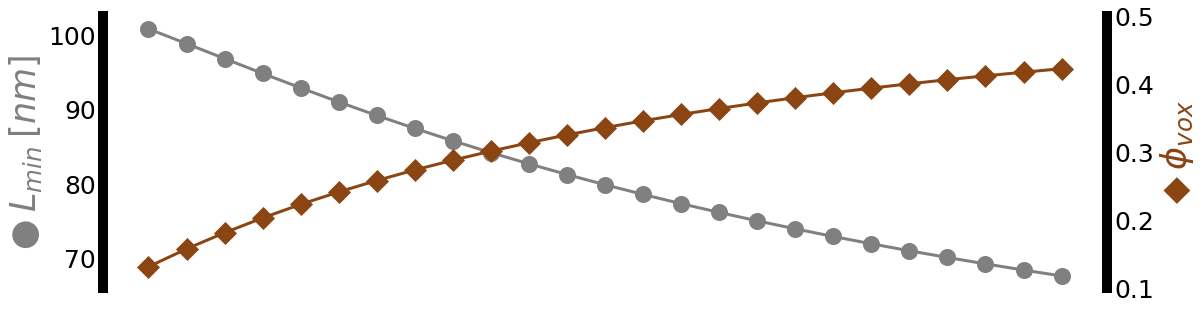

In [55]:
gr=np.array([6,10,15,20,25,30])
for i in gr:
    print("Doubling rate: ", dbl_rate[i])
    print("Voxel length: ", vox_len[i])
    print("Ribosome number: ", rib_num[i])
    print("Ternary complex number ",tern_num[i])
    print("Crowder number ", crowder_num[i])
    print('Crowder vol frac ', crowder_volfrac[i])
    print('rib vol frac', rib_volfrac[i])
    print('Total vol frac', total_volfrac[i])
    print("\n")
print(np.array(vox_len)[gr])
print(np.array(total_volfrac)[gr])

fig, ax = plt.subplots(1,1,figsize=(18,5))

gr = np.arange(6,31,1)
#ax.plot(gr/10,np.array(vox_len)[gr]*1000,c='black',linewidth=15,zorder=0)#marker='x',markersize=10,markeredgewidth=10)
ax.plot(gr/10,np.array(vox_len)[gr]*1000,c='grey',linewidth=3,zorder=1,marker='o',markersize=12,markeredgewidth=5)

ax.set_ylabel('$\u25CF\:L_{min}\:[nm] $',size=35,color='grey')

ax2 = ax.twinx()
#ax2.plot(gr/10,np.array(total_volfrac)[gr],c='black',linewidth=15,zorder=2)
ax2.plot(gr/10,np.array(total_volfrac)[gr],c='saddlebrown',linewidth=3,zorder=3,marker='D',markersize=12,markeredgewidth=5)

ax.tick_params(axis='both', which='major',width=4, labelsize=25)
ax2.tick_params(axis='both', which='major',width=4, labelsize=25)
ax2.set_ylim(0.1,0.5)
ax2.set_ylabel('$\u25C6\:\phi_{vox}$',size=35,color='saddlebrown')

ax.spines['right'].set_linewidth(10)
ax.spines['left'].set_linewidth(10)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.get_xaxis().set_visible(False)

#ax2.set_ylabel("Translation Units per cell",fontsize=36,rotation=270,color='C0')
